# Loan Data Set Exploration

## Importing required libraries

In [80]:
import pandas as pd
import numpy as np
import scipy.stats

import matplotlib
import matplotlib.pyplot as pp
import seaborn as sns

from string import ascii_letters
import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib

%matplotlib inline
sns.set_theme(context='notebook', style='darkgrid')

In [2]:
loan = pd.read_csv('loan.csv', dtype={'Current Credit Balance': 'int64'})

C:\Users\imran\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
loan.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
loan.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


## Step 1: Cleaning the Dataframe

### Credit Score: Dealing with missing values

In [6]:
loan.isna().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

* Credit score: 61676 missing entries, that's a significant proportion of the data. Dropping the rows is not a good option in this case. We will replace those with the mean credit score.

In [7]:
loan['Credit Score'] = loan['Credit Score'].fillna(loan['Credit Score'].mean())


In [8]:
loan['Credit Score'].isna().sum()

0

### Years in current job

* There are 11476 missing entries
* We can change it to integer, by dropping the '+ years' part of the entry and any other invalud string

In [9]:
loan['Years in current job'] = loan['Years in current job'].str.strip(r'+ years').replace('< 1', '1').fillna(0)

In [10]:
loan['Years in current job'] = loan['Years in current job'].astype(int)

In [11]:
loan['Years in current job'].describe()

count    256984.000000
mean          5.689058
std           3.632340
min           0.000000
25%           2.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Years in current job, dtype: float64

### Annual Income
* There are 61676 missing entries, the same number of missing entries as Credit Score. Similaliry, we can fill these with the mean.

In [12]:
loan['Annual Income'] = loan['Annual Income'].fillna(loan['Annual Income'].mean())

In [13]:
loan['Annual Income'].isnull().sum()

0

### Months since last delinquent 

* 140383 nan entries for Months since last delinquent.
* Looking at the data, it can be result of not having any late payments, therefore we can replace it with 0.

In [14]:
loan['Months since last delinquent']= loan['Months since last delinquent'].fillna(0)

In [15]:
loan['Months since last delinquent'].isnull().sum()

0

### Bankruptcies

* 529 missing entries, we can fill it with 0 as the mean is 0.11

In [16]:
loan['Bankruptcies'] = loan['Bankruptcies'].fillna(0)

### Tax Liens
* Only 29 missing entries, with mean of 0.02, we will fill it with 0

In [17]:
loan['Tax Liens'] = loan['Tax Liens'].fillna(0)

In [18]:
loan.isna().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

* We have completed filling all the missing entries

### Duplicate records

* There are 215700 unique records for 'Loan ID' and 'Customer ID', resulting in 41284 duplicate records in the dataset to be removed.

In [19]:
loan['Loan ID'].nunique()

215700

In [20]:
loan['Customer ID'].nunique()

215700

In [21]:
loan.drop_duplicates(subset=['Loan ID', 'Customer ID'], inplace=True)

In [22]:
loan.value_counts().sum()

215700

### Correcting dtypes

* Monthly Debt column contains '$' signs in the begining of the recods
* Maximum Open Credit has #VALUE! as entry

In [23]:
loan['Monthly Debt'] = loan['Monthly Debt'].str.strip(r'$')

In [24]:
loan['Monthly Debt'][0]

'584.03'

In [25]:
loan['Monthly Debt'] = loan['Monthly Debt'].apply( lambda x:   x.replace(',', ''))

In [26]:
loan['Monthly Debt'] = loan['Monthly Debt'].astype(float)

In [27]:
loan.isna().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

#### Correcting Maximum Open Credit

In [28]:
loan['Maximum Open Credit'] .value_counts().sort_values(ascending=False)

0        1381
0         206
15662      15
10198      15
12202      14
         ... 
53892       1
33608       1
44508       1
28781       1
62371       1
Name: Maximum Open Credit, Length: 87025, dtype: int64

In [29]:
loan['Maximum Open Credit']  = loan['Maximum Open Credit'] .replace(to_replace=r'#VALUE!', value=0, regex=True)

In [30]:
loan['Maximum Open Credit'] = loan['Maximum Open Credit'].astype(float)

In [31]:
loan['Maximum Open Credit'].dtypes

dtype('float64')

In [32]:
loan['Maximum Open Credit'] .value_counts().sort_values(ascending=False)

0.0        1589
10198.0      17
14803.0      17
10501.0      16
21517.0      16
           ... 
63112.0       1
31311.0       1
74939.0       1
59305.0       1
62371.0       1
Name: Maximum Open Credit, Length: 68883, dtype: int64

### Correcting purpose entries

In [33]:
loan['Purpose'].value_counts(normalize=True)

Debt Consolidation      0.793213
Home Improvements       0.059527
other                   0.054363
Other                   0.038391
Business Loan           0.016741
Buy a Car               0.013565
Medical Bills           0.011011
Take a Trip             0.006083
Buy House               0.006064
Educational Expenses    0.001043
Name: Purpose, dtype: float64

* There are two 'Other' entries for purpose, one with a capital and one without. We will map them into one.

In [34]:
loan['Purpose'] = loan['Purpose'].replace(['Other', 'other'], 'Other Reasons')

In [35]:
loan['Purpose'].value_counts(normalize=True)

Debt Consolidation      0.793213
Other Reasons           0.092754
Home Improvements       0.059527
Business Loan           0.016741
Buy a Car               0.013565
Medical Bills           0.011011
Take a Trip             0.006083
Buy House               0.006064
Educational Expenses    0.001043
Name: Purpose, dtype: float64

### Correcting Home Ownership Entries

In [36]:
loan['Home Ownership'].value_counts()

Home Mortgage    106492
Rent              89619
Own Home          19094
HaveMortgage        495
Name: Home Ownership, dtype: int64

In [37]:
loan['Home Ownership'] = loan['Home Ownership'].replace('HaveMortgage', 'Home Mortgage')

In [38]:
loan['Home Ownership'].value_counts()

Home Mortgage    106987
Rent              89619
Own Home          19094
Name: Home Ownership, dtype: int64

### Outliers

#### Credit Score

<AxesSubplot:xlabel='Credit Score'>

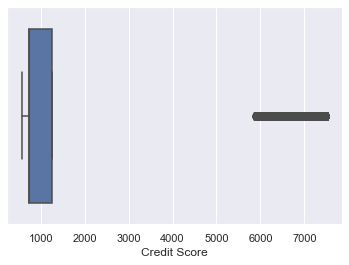

In [39]:
sns.boxplot(x=loan['Credit Score'])

* Above plot shows block of entries for credit score around 6000 to 8000, these are outliers as there not included in the box of other observations (near the quartiles).

In [40]:
credit_outlier = loan[loan['Credit Score'] > 5000].count()[0]
credit_in = loan[loan['Credit Score'] < 2000].count()[0]
credit_outlier, credit_in

(14433, 201267)

* There are 14,433 records that have credit score above 5000 and 201, 267 entries below credit score of 2000
* There's no credit score entries between 2000 and 5000, indicating that there is an issue here.
* One explaination could be that the records are from different credit agencies with different credit scoring range, we will remove the records above 2000 Credit Score.

In [41]:
loan = loan[loan['Credit Score'] < 2000]

In [42]:
loan.shape

(201267, 19)

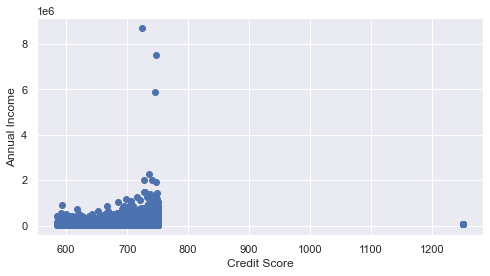

In [43]:
fig, ax = pp.subplots(figsize=(8,4))
ax.scatter(loan['Credit Score'], loan['Annual Income'])
ax.set_xlabel('Credit Score')
ax.set_ylabel('Annual Income')
pp.show()

* There's still an empty gap between the records in the range of 550-750 and 1200+
* Research shows that most credit scores are in the range of 350 and 850

In [44]:
loan[loan['Credit Score'] > 850].count()[0]

55008

In [45]:
loan = loan[loan['Credit Score'] <=  850]
loan.shape

(146259, 19)

<AxesSubplot:xlabel='Credit Score'>

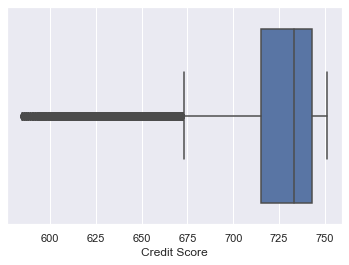

In [46]:
sns.boxplot(x=loan['Credit Score'])

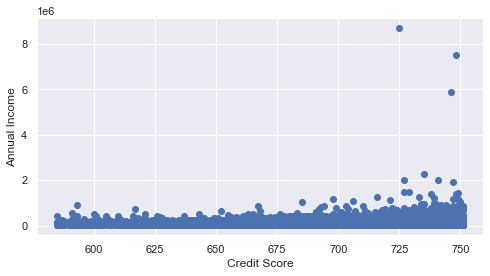

In [47]:
fig, ax = pp.subplots(figsize=(8,4))
ax.scatter(loan['Credit Score'], loan['Annual Income'])
ax.set_xlabel('Credit Score')
ax.set_ylabel('Annual Income')
pp.show()

* The box plot and scatter diagram show that the spread of data is more even, with very few outliers now.

#### Current Loan Amount

<AxesSubplot:xlabel='Current Loan Amount'>

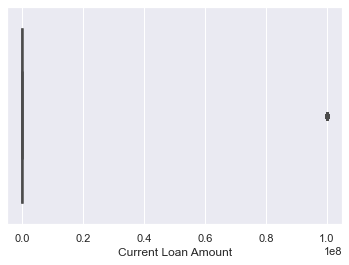

In [48]:
sns.boxplot(x=loan['Current Loan Amount'])

In [49]:
loan['Current Loan Amount'].value_counts().sort_index(ascending=False)

99999999    35210
39304           1
35875           3
35872           6
35868          14
            ...  
899             1
809             1
768             1
511             1
505             1
Name: Current Loan Amount, Length: 24167, dtype: int64

* Clearly there is a problem here, we have over 35210 entries with 99,999,999 (99 million)
* Sometimes 9's are used for unknowns or if  there is a floating-point computation problem.
* This is a standard artifact of how computers do arithmetic -- convert decimal number to binary (which means most fractions cannot be exactly represented in a finite amount of memory), perform the operation, then convert back to decimal. This is a common and well known feature/bug in computer arithmetic and has been well described for many years

In [50]:
odd_amount  = loan[loan['Current Loan Amount'] == 99999999]

odd_amount['Loan Status'].value_counts()

Fully Paid    35210
Name: Loan Status, dtype: int64

* All the current loan amounts with 99 million have been fully paid.
* As a result, I am going to assume that they are meant to be 0's instead of 99million and replace those values in the dataset.

In [51]:
loan['Current Loan Amount'] = loan['Current Loan Amount'].replace(99999999, 0)

<AxesSubplot:xlabel='Current Loan Amount'>

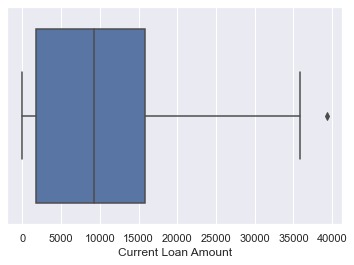

In [52]:
sns.boxplot(x=loan['Current Loan Amount'])

In [53]:
outlier  = loan[loan['Current Loan Amount'] >= 37000]
outlier.shape

(1, 19)

* The boxplot looks much better now, we have a range of values from 0 to 35,000.
* Only 19 outliers above the 37,000 range, we can leave them in this case.

## Part 2: Exploratory Data Analysis 

* Plotting a diagonal correlation matrix

<AxesSubplot:>

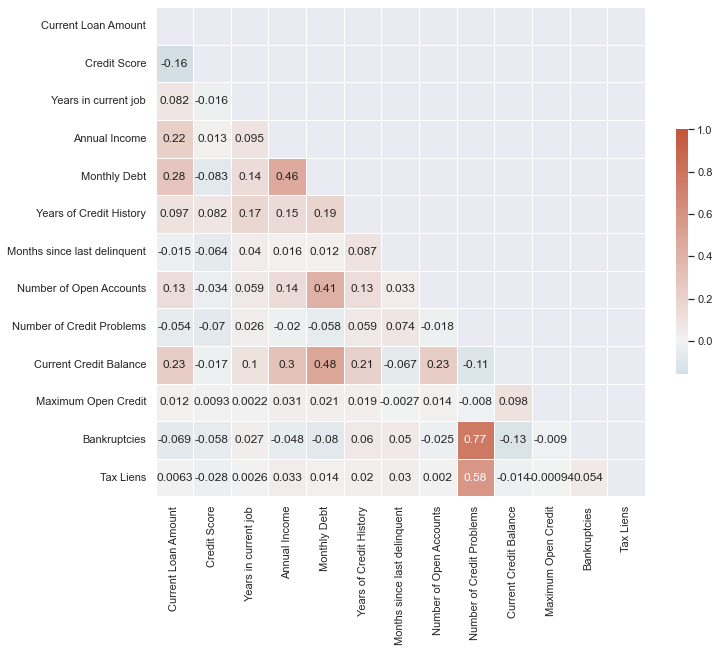

In [54]:
#Matrix correlation
corr = loan.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = pp.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax = 1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True)

* The correlation map shows the strength of linear relationship between two variables.
* Right from the start, you can see there is a positive strong correlation between Bankruptcies and Number of Credit Problems. 
* There is also strong correlation between Monthly Debt and Current Credit Balance and Number of Open Accounts.
* Majority of other variables have no relationship

### Histogram of Credit Score and Purpose

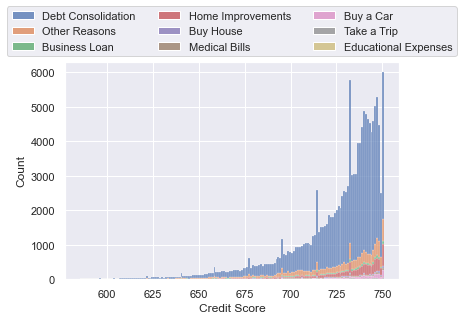

In [55]:
ax = sns.histplot(data=loan, x='Credit Score', hue='Purpose', multiple='stack')

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

* Majority of the credit scores are in the 725- 750 range, which is in the good to excellent band range of most credit providers
* The diagram also shows that the main purpose of the credit loans are debt consolidation
* Debt consolidation is a form of debt refinancing that entails taking out one loan to pay off many others. This commonly refers to a personal finance process of individuals addressing high consumer debt, but occasionally it can also refer to a country's fiscal approach to consolidate corporate debt or government debt

### Years in current job and Purpose

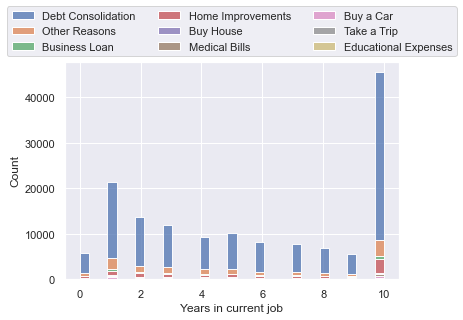

In [56]:
ax = sns.histplot(data=loan, x='Years in current job', hue='Purpose', multiple='stack')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True,
)

* Over 40,000 of the records are from those with over 10 years in their current job.
* With over 20,000 with a year in their current job
* This can indicate that people are more likely to get a loan in their first year of after 10 years in their current role.

### Credit Score and Loan Status

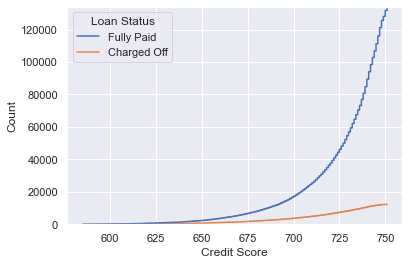

In [57]:
ax = sns.ecdfplot(data=loan, x='Credit Score', hue='Loan Status', stat='count', complementary=False, )

In [58]:
loan['Loan Status'].value_counts(normalize=True)

Fully Paid     0.91606
Charged Off    0.08394
Name: Loan Status, dtype: float64

* The diagram shows that majority of the loans have been fully paid.

* 91% of loans have been fully paid off, while 8% have been charged off.

### Home Ownership

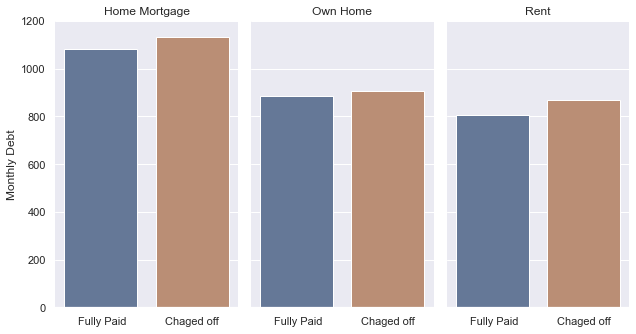

In [59]:
g = sns.catplot(data=loan, x= 'Loan Status', y='Monthly Debt', col='Home Ownership', saturation=.5,
               kind='bar', ci=None, aspect=.6)
g.set_axis_labels("", 'Monthly Debt')
g.set_xticklabels([' Fully Paid', 'Chaged off'])
g.set_titles("{col_name}")
g.set(ylim=(0,1200))
g.despine(left=True)

* Interesting to see that for each Home Ownership category, customers that were charged off had a slightly higher monthly debt than those that fully paid it. 

In [60]:
loan.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056.0,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4,Home Mortgage,42269.0,Other Reasons,1106.04,26.3,0.0,17,0,6262,19149.0,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,0.0,5,0,20967,28335.0,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10,Own Home,38072.0,Debt Consolidation,751.92,26.2,0.0,9,0,22529,43915.0,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4,Rent,50025.0,Debt Consolidation,355.18,11.5,0.0,12,0,17391,37081.0,0.0,0.0


In [61]:
loan.Term.value_counts()

Short Term    115377
Long Term      30882
Name: Term, dtype: int64

## Part 3: Cleaning and Creating Features

### Converting categorical data to numeric

In [62]:
for feature in ['Loan Status', 'Term', 'Home Ownership', 'Purpose']:
    le = LabelEncoder()
    loan[feature] = le.fit_transform(loan[feature].astype(str))


In [63]:
loan.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,1,741.0,10,0,33694.0,3,584.03,12.3,41.0,10,0,6760,16056.0,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,1,734.0,4,0,42269.0,7,1106.04,26.3,0.0,17,0,6262,19149.0,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,1,747.0,10,0,90126.0,3,1321.85,28.8,0.0,5,0,20967,28335.0,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,1,747.0,10,1,38072.0,3,751.92,26.2,0.0,9,0,22529,43915.0,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,1,746.0,4,2,50025.0,3,355.18,11.5,0.0,12,0,17391,37081.0,0.0,0.0


## Part 4: Split the data into Train, Validate and Test

In [64]:
#We will not be using the Loan ID and Customer ID in our models as it can cause problems with the results, given that they are not meaningful to Loan Status.
loan_ml = loan.drop(['Loan ID', 'Customer ID'], axis=1)
loan_ml.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,1,741.0,10,0,33694.0,3,584.03,12.3,41.0,10,0,6760,16056.0,0.0,0.0
1,1,3441,1,734.0,4,0,42269.0,7,1106.04,26.3,0.0,17,0,6262,19149.0,0.0,0.0
2,1,21029,1,747.0,10,0,90126.0,3,1321.85,28.8,0.0,5,0,20967,28335.0,0.0,0.0
3,1,18743,1,747.0,10,1,38072.0,3,751.92,26.2,0.0,9,0,22529,43915.0,0.0,0.0
4,1,11731,1,746.0,4,2,50025.0,3,355.18,11.5,0.0,12,0,17391,37081.0,0.0,0.0


In [65]:
features = loan_ml.drop(['Loan Status'], axis=1)
labels = loan_ml['Loan Status']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

x_train.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
109344,12126,1,747.0,9,0,77809.0,3,1169.08,24.0,0.0,17,0,75140,115957.0,0.0,0.0
166183,14934,0,703.0,10,1,69692.0,3,1173.15,18.2,22.0,9,0,11159,12945.0,0.0,0.0
52038,30699,1,744.0,4,0,65241.0,3,918.81,21.5,0.0,10,0,33450,66502.0,0.0,0.0
220507,18850,1,717.0,10,1,64571.0,3,1016.99,17.5,0.0,11,1,3254,15798.0,1.0,0.0
44285,7140,0,717.0,10,0,74370.0,3,545.38,20.0,0.0,10,0,3805,35894.0,0.0,0.0


In [66]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/ len(labels), 2))

0.6
0.2
0.2


## Part 5: Machine Learning: Applying Random Forest

x_train.to_csv('data/train_features.csv', index=False)
x_val.to_csv('data/val_features.csv', index=False)
x_test.to_csv('data/test_features.csv', index=False)

y_train.to_csv('data/train_labels.csv', index=False)
y_val.to_csv('data/val_labels.csv', index=False)
y_test.to_csv('data/test_labels.csv', index=False)

### GridSearchCV

In [67]:
def print_results(results):
    print(f'BEST PARAMS: {results.best_params_}')
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean,3)} (+/- { round(std*2, 3)}) for { params}')

In [68]:
# Conduct search for best params while running crosss-validation (GridSearchCV)

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 6)],
    'max_depth': [2, 4, 6, 8, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(x_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 8}
0.916 (+/- 0.0) for {'max_depth': 2, 'n_estimators': 8}
0.916 (+/- 0.0) for {'max_depth': 2, 'n_estimators': 16}
0.916 (+/- 0.0) for {'max_depth': 2, 'n_estimators': 32}
0.916 (+/- 0.0) for {'max_depth': 4, 'n_estimators': 8}
0.916 (+/- 0.0) for {'max_depth': 4, 'n_estimators': 16}
0.916 (+/- 0.0) for {'max_depth': 4, 'n_estimators': 32}
0.916 (+/- 0.0) for {'max_depth': 6, 'n_estimators': 8}
0.916 (+/- 0.0) for {'max_depth': 6, 'n_estimators': 16}
0.916 (+/- 0.0) for {'max_depth': 6, 'n_estimators': 32}
0.916 (+/- 0.0) for {'max_depth': 8, 'n_estimators': 8}
0.916 (+/- 0.0) for {'max_depth': 8, 'n_estimators': 16}
0.916 (+/- 0.0) for {'max_depth': 8, 'n_estimators': 32}
0.903 (+/- 0.002) for {'max_depth': None, 'n_estimators': 8}
0.912 (+/- 0.001) for {'max_depth': None, 'n_estimators': 16}
0.915 (+/- 0.0) for {'max_depth': None, 'n_estimators': 32}


In [70]:
cv.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=8)

In [71]:
cv.best_params_

{'max_depth': 2, 'n_estimators': 8}

In [72]:
cv.best_score_

0.9164264144493192

The results for the Random Forest Classifier gives us a best score of 91%, with best params of max depth 2 and estimators of 8.

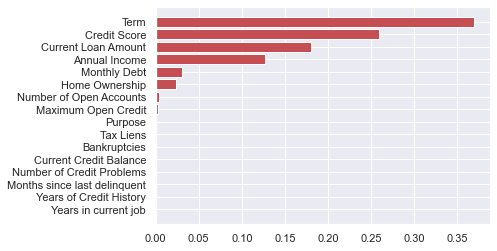

In [75]:
#Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
pp.yticks(range(len(indices)), [x_train.columns[i] for i in indices])
pp.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
pp.show()

* Term plays the most significant role in determing Loan status, with a weight of 0.35.
* Credit score surprisnly comes second in determing Loan status, with a weight of 2.25
* The other two factors that play a significant role are Current Loan Amount and Annual Income.

In [81]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'rfc_1.pk1')

['rfc_1.pk1']